In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Menu_df.csv')

In [4]:
df.head(5)

,Unnamed: 0,MenuItemID,ItemName,Category,BasePrice,DemandLevel,Weather,Temperature,DayOfWeek,Holiday,SpecialEvent,Date,Time,PriceChange,DynamicPrice
0,0,1,Grilled Salmon,Main Course,20,52,Cloudy,-1,Sunday,No,No,2022-01-01,00:00:00,0.52,20.52
1,1,2,Caesar Salad,Salad,12,93,Sunny,28,Thursday,No,No,2022-01-01,01:00:00,0.93,12.93
2,2,3,Margherita Pizza,Pizza,15,15,Rainy,0,Wednesday,No,No,2022-01-01,02:00:00,-3.00,12.00
3,3,4,Spicy Tuna Roll,Sushi,10,72,Sunny,-4,Wednesday,No,No,2022-01-01,03:00:00,0.72,10.72
4,4,5,Chocolate Lava Cake,Dessert,8,61,Sunny,7,Thursday,No,Yes,2022-01-01,04:00:00,-1.60,6.40


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,MenuItemID,ItemName,Category,BasePrice,DemandLevel,Weather,Temperature,DayOfWeek,Holiday,SpecialEvent,Date,Time,PriceChange,DynamicPrice
0,1,Grilled Salmon,Main Course,20,52,Cloudy,-1,Sunday,No,No,2022-01-01,00:00:00,0.52,20.52
1,2,Caesar Salad,Salad,12,93,Sunny,28,Thursday,No,No,2022-01-01,01:00:00,0.93,12.93
2,3,Margherita Pizza,Pizza,15,15,Rainy,0,Wednesday,No,No,2022-01-01,02:00:00,-3.00,12.00
3,4,Spicy Tuna Roll,Sushi,10,72,Sunny,-4,Wednesday,No,No,2022-01-01,03:00:00,0.72,10.72
4,5,Chocolate Lava Cake,Dessert,8,61,Sunny,7,Thursday,No,Yes,2022-01-01,04:00:00,-1.60,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,Grilled Salmon,Main Course,20,93,Rainy,18,Thursday,No,No,2022-01-21,15:00:00,0.93,20.93
496,2,Caesar Salad,Salad,12,67,Sunny,16,Monday,No,No,2022-01-21,16:00:00,0.67,12.67
497,3,Margherita Pizza,Pizza,15,76,Snowy,-1,Saturday,No,No,2022-01-21,17:00:00,0.76,15.76
498,4,Spicy Tuna Roll,Sushi,10,26,Snowy,27,Monday,No,No,2022-01-21,18:00:00,-2.00,8.00


In [7]:
df.drop(['MenuItemID','PriceChange'],axis=1,inplace=True)

In [8]:
df

,ItemName,Category,BasePrice,DemandLevel,Weather,Temperature,DayOfWeek,Holiday,SpecialEvent,Date,Time,DynamicPrice
0,Grilled Salmon,Main Course,20,52,Cloudy,-1,Sunday,No,No,2022-01-01,00:00:00,20.52
1,Caesar Salad,Salad,12,93,Sunny,28,Thursday,No,No,2022-01-01,01:00:00,12.93
2,Margherita Pizza,Pizza,15,15,Rainy,0,Wednesday,No,No,2022-01-01,02:00:00,12.00
3,Spicy Tuna Roll,Sushi,10,72,Sunny,-4,Wednesday,No,No,2022-01-01,03:00:00,10.72
4,Chocolate Lava Cake,Dessert,8,61,Sunny,7,Thursday,No,Yes,2022-01-01,04:00:00,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Grilled Salmon,Main Course,20,93,Rainy,18,Thursday,No,No,2022-01-21,15:00:00,20.93
496,Caesar Salad,Salad,12,67,Sunny,16,Monday,No,No,2022-01-21,16:00:00,12.67
497,Margherita Pizza,Pizza,15,76,Snowy,-1,Saturday,No,No,2022-01-21,17:00:00,15.76
498,Spicy Tuna Roll,Sushi,10,26,Snowy,27,Monday,No,No,2022-01-21,18:00:00,8.00


In [9]:
df.drop('Time',axis=1,inplace=True)

In [10]:
df

,ItemName,Category,BasePrice,DemandLevel,Weather,Temperature,DayOfWeek,Holiday,SpecialEvent,Date,DynamicPrice
0,Grilled Salmon,Main Course,20,52,Cloudy,-1,Sunday,No,No,2022-01-01,20.52
1,Caesar Salad,Salad,12,93,Sunny,28,Thursday,No,No,2022-01-01,12.93
2,Margherita Pizza,Pizza,15,15,Rainy,0,Wednesday,No,No,2022-01-01,12.00
3,Spicy Tuna Roll,Sushi,10,72,Sunny,-4,Wednesday,No,No,2022-01-01,10.72
4,Chocolate Lava Cake,Dessert,8,61,Sunny,7,Thursday,No,Yes,2022-01-01,6.40
...,...,...,...,...,...,...,...,...,...,...,...
495,Grilled Salmon,Main Course,20,93,Rainy,18,Thursday,No,No,2022-01-21,20.93
496,Caesar Salad,Salad,12,67,Sunny,16,Monday,No,No,2022-01-21,12.67
497,Margherita Pizza,Pizza,15,76,Snowy,-1,Saturday,No,No,2022-01-21,15.76
498,Spicy Tuna Roll,Sushi,10,26,Snowy,27,Monday,No,No,2022-01-21,8.00


## Feature Engineering

In [11]:

df['PriceChange'] = df['DynamicPrice']-df['BasePrice']

In [12]:
df.head()

,ItemName,Category,BasePrice,DemandLevel,Weather,Temperature,DayOfWeek,Holiday,SpecialEvent,Date,DynamicPrice,PriceChange
0,Grilled Salmon,Main Course,20,52,Cloudy,-1,Sunday,No,No,2022-01-01,20.52,0.52
1,Caesar Salad,Salad,12,93,Sunny,28,Thursday,No,No,2022-01-01,12.93,0.93
2,Margherita Pizza,Pizza,15,15,Rainy,0,Wednesday,No,No,2022-01-01,12.00,-3.00
3,Spicy Tuna Roll,Sushi,10,72,Sunny,-4,Wednesday,No,No,2022-01-01,10.72,0.72
4,Chocolate Lava Cake,Dessert,8,61,Sunny,7,Thursday,No,Yes,2022-01-01,6.40,-1.60


In [13]:
# Dropping the unnecessary columns
df.drop(['BasePrice','DynamicPrice'],axis=1,inplace=True)

In [14]:
df['Day'] = df['Date'].apply(lambda x: x.split('-')[-1])

In [15]:
df.drop('Date',axis=1,inplace=True)

In [16]:
df.drop(['Day','ItemName'],axis=1,inplace=True)

In [17]:
df

,Category,DemandLevel,Weather,Temperature,DayOfWeek,Holiday,SpecialEvent,PriceChange
0,Main Course,52,Cloudy,-1,Sunday,No,No,0.52
1,Salad,93,Sunny,28,Thursday,No,No,0.93
2,Pizza,15,Rainy,0,Wednesday,No,No,-3.00
3,Sushi,72,Sunny,-4,Wednesday,No,No,0.72
4,Dessert,61,Sunny,7,Thursday,No,Yes,-1.60
...,...,...,...,...,...,...,...,...
495,Main Course,93,Rainy,18,Thursday,No,No,0.93
496,Salad,67,Sunny,16,Monday,No,No,0.67
497,Pizza,76,Snowy,-1,Saturday,No,No,0.76
498,Sushi,26,Snowy,27,Monday,No,No,-2.00


## EDA

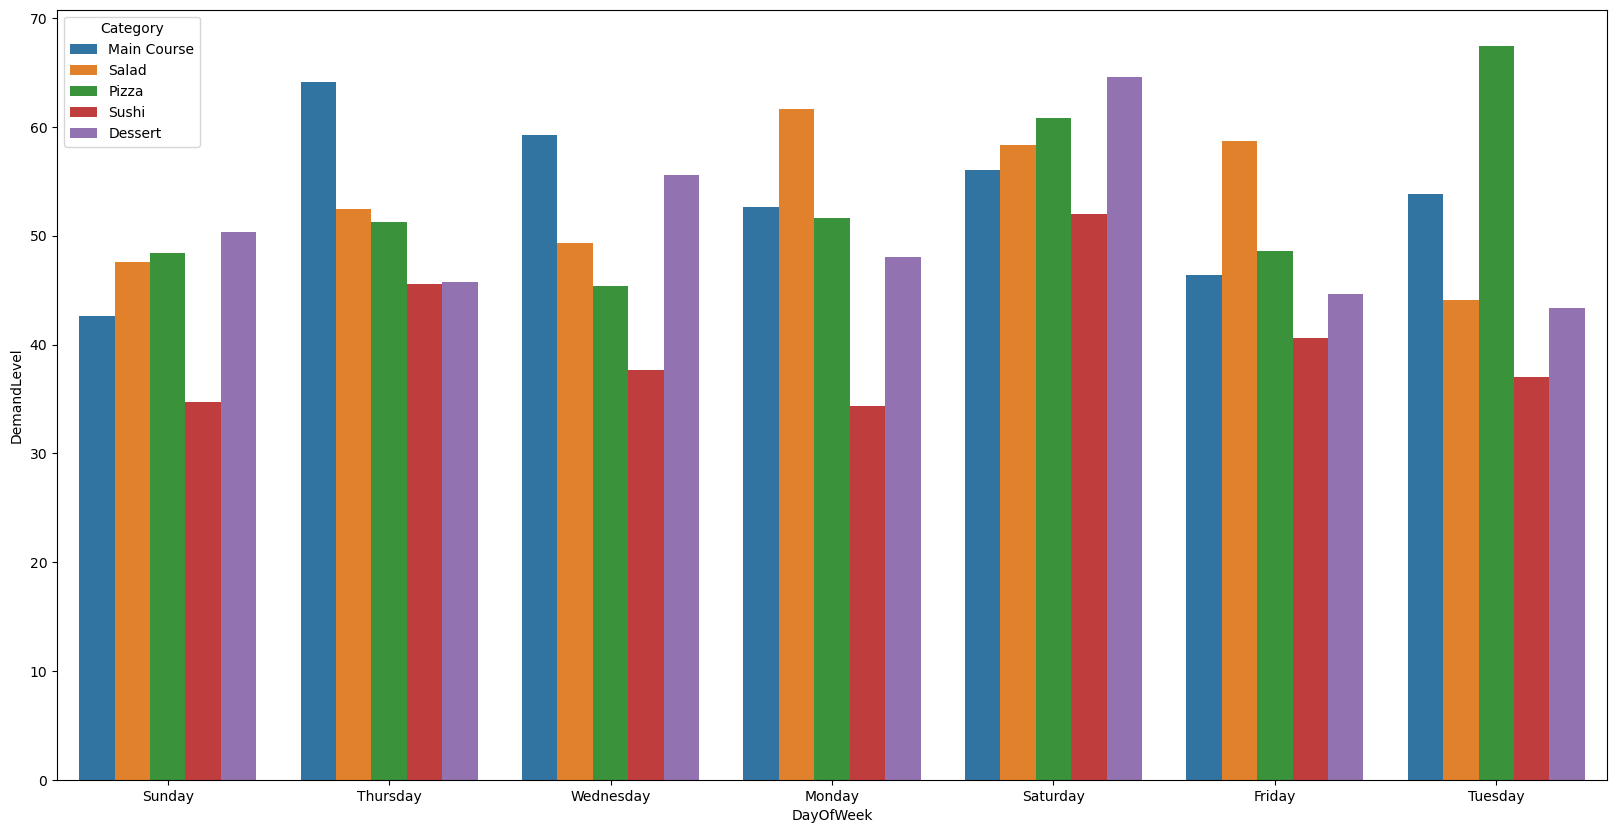

In [19]:
# univariate analysis
plt.figure(figsize=(20,10))
sns.barplot(y='DemandLevel',x='DayOfWeek',data=df,hue='Category',errorbar=None)
plt.show()


- The x-axis represents days of the week, from Sunday through Tuesday.
- The y-axis indicates the demand level, which is numerical and seems to range approximately from 0 to 70.
- The bars are color-coded to represent different food categories: Main Course, Salad, Pizza, Sushi, and Dessert.
- For most days, Main Course seems to have the highest demand, often being the tallest bar.
- Demand for Salads and Sushi appears relatively stable across the week, without significant peaks or troughs.
- Demand for Desserts shows a notable increase on Tuesday.
- The demand for Pizza peaks mid-week on Wednesday.

This chart can be used by a restaurant to understand customer preferences and demand patterns throughout the week, allowing for better inventory management and planning of special promotions or offers. For instance, considering the higher demand for Desserts on Tuesday, a restaurant might consider a "Dessert Special" on that day to attract more customers.

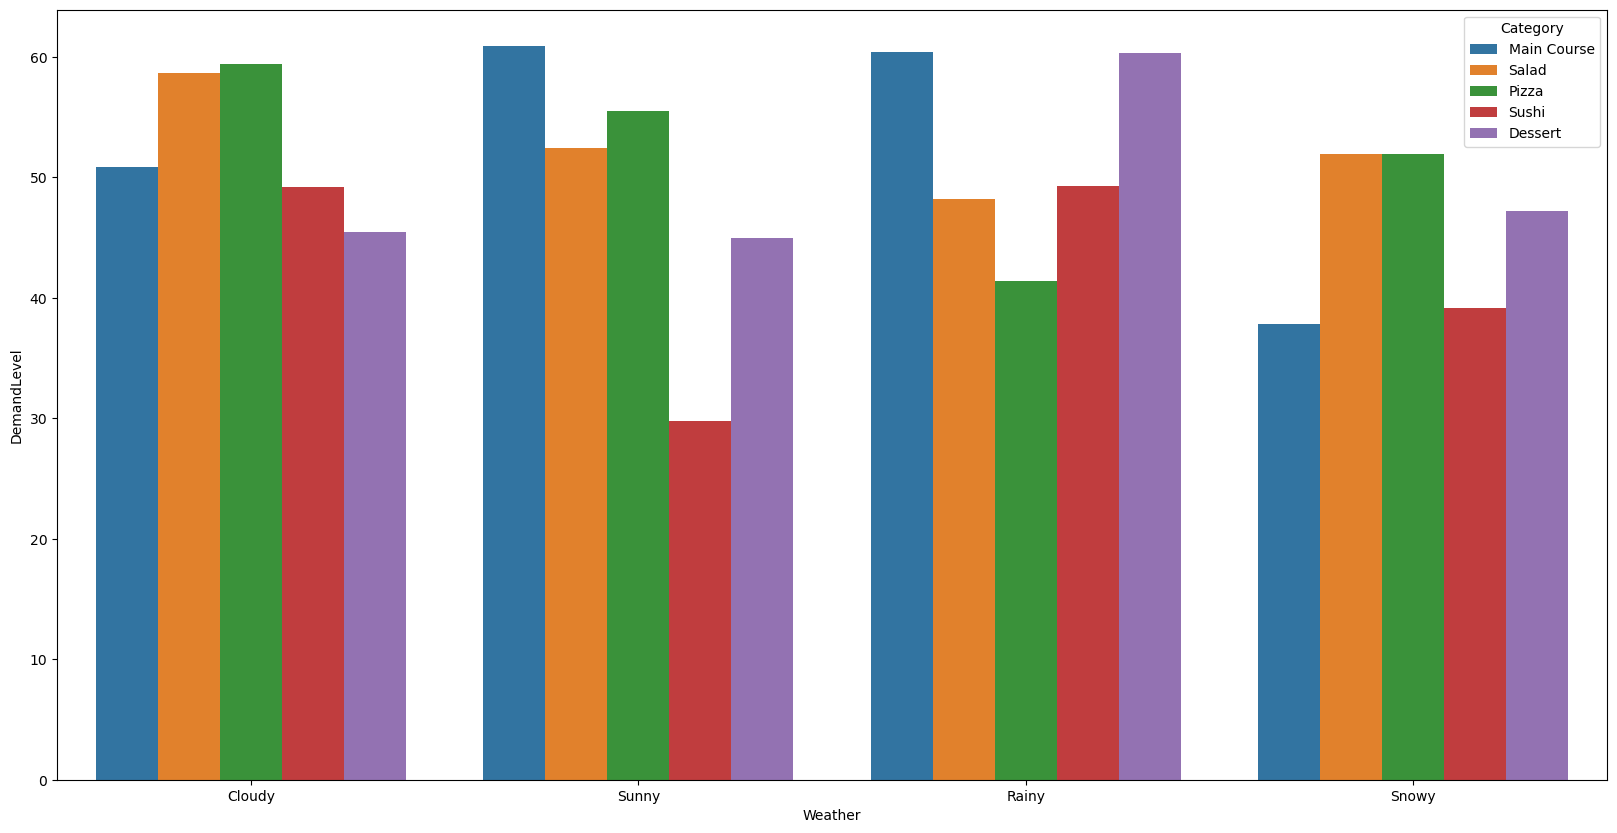

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(y='DemandLevel',x='Weather',data=df,hue='Category',errorbar=None)
plt.show()


- The x-axis represents different weather conditions: Cloudy, Sunny, Rainy, and Snowy.
- The y-axis indicates the demand level, which is numerical and seems to range from 0 to around 60 or more.
- The bars are color-coded to represent different food categories, such as Main Course, Salad, Pizza, Sushi, and Dessert.
- Under Cloudy and Sunny weather conditions, the demand for Main Course items is the highest compared to other categories.
- During Rainy weather, the demand for Main Course and Pizza is relatively higher, whereas the demand for Salad, Sushi, and Dessert appears to be lower.
- In Snowy weather, the demand for Main Course and Pizza is also high, but there seems to be a noticeable increase in demand for Dessert compared to Rainy weather.

This chart can be useful for a restaurant to adapt its menu and stock according to the weather forecast. For example, it might be beneficial to prepare for higher demand for warm main courses and pizza on colder, Rainy, and Snowy days, while ensuring a good supply of desserts specifically when it's Snowy. On the other hand, on Sunny days, the demand seems to be more evenly distributed across different categories.

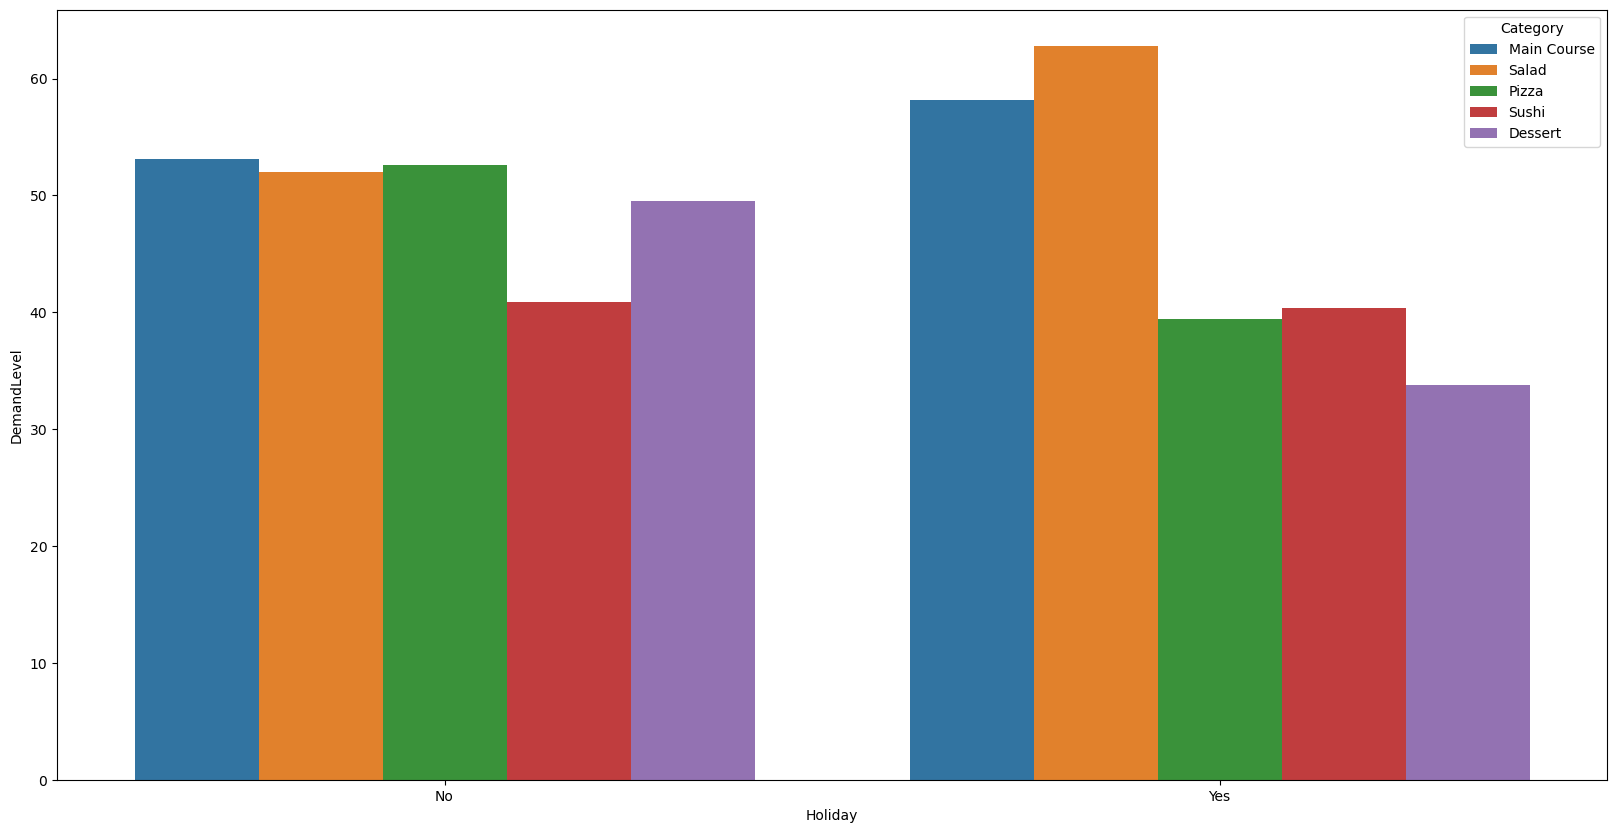

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(y='DemandLevel',x='Holiday',data=df,hue='Category',errorbar=None)
plt.show()


- The x-axis categorizes the data into two groups: Non-holiday ("No") and Holiday ("Yes").
- The y-axis represents the demand level, with numerical values that seem to range from 0 to above 60.
- The bars are color-coded to represent various food categories: Main Course, Salad, Pizza, Sushi, and Dessert.

From what can be seen:

- On non-holidays, the demand for all categories is relatively high and evenly distributed, with Main Course slightly leading.
- On holidays, the demand for Main Course and Pizza increases significantly, while the demand for Salad, Sushi, and Dessert decreases in comparison to non-holiday demand.

This suggests that holidays influence dining choices, with people perhaps preferring more indulgent or celebratory foods like Main Courses and Pizza. The restaurant could use this information to adjust inventory and staffing on holidays and possibly run promotions for the more popular items to maximize revenue.

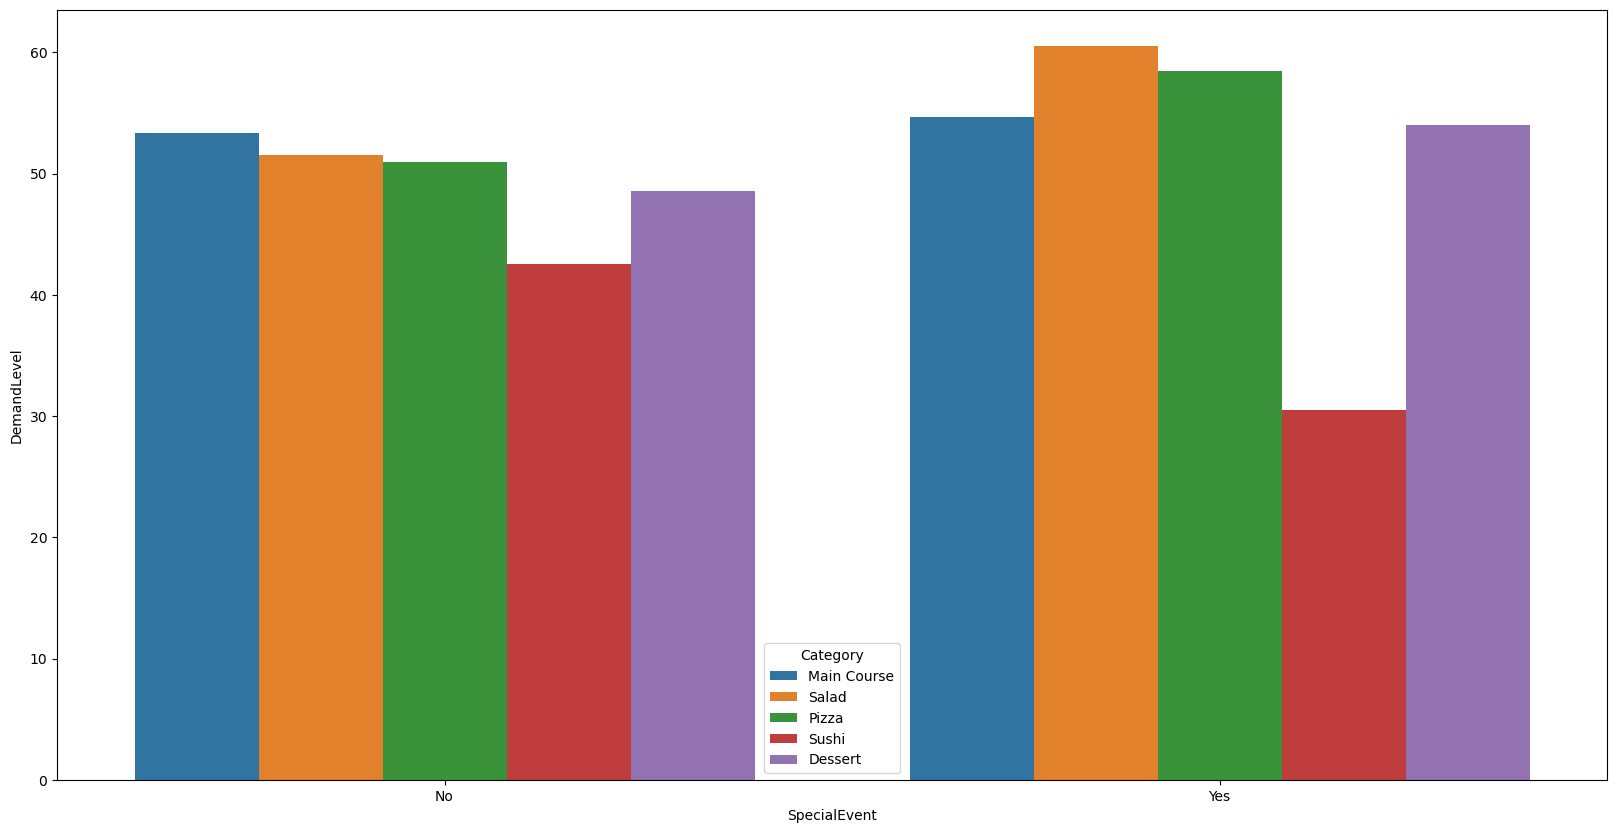

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(y='DemandLevel',x='SpecialEvent',data=df,hue='Category',errorbar=None)
plt.show()


- The x-axis has two categories: "No" for times without a special event and "Yes" for times when there is a special event.
- The y-axis represents the demand level, with values that seem to range from 0 to above 60.
- The bars are color-coded to represent various food categories: Main Course, Salad, Pizza, Sushi, and Dessert.

Based on the chart:

- When there is no special event, demand for all categories is relatively balanced, with Main Course and Pizza having a slight edge.
- During special events, the demand for Main Course and Pizza increases significantly, while demand for Salad, Sushi, and Dessert decreases slightly.

This information could suggest that special events drive customers to opt for more traditional or fulfilling dishes such as Main Courses and Pizza. On the other hand, lighter options like Salads and Sushi are less favored during these events. A restaurant might use this data to plan menus and promotions around special events, ensuring a sufficient supply of popular items to meet increased demand.

## Encoding the Categorical Variables

In [43]:
categorical_features = [ 'Category', 'Weather', 'Holiday', 'SpecialEvent','DayOfWeek']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [44]:
numerical_features = ['DemandLevel', 'Temperature']

In [47]:
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)], remainder='passthrough')

In [87]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42,n_estimators=100))])

In [78]:
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', DecisionTreeRegressor(random_state=42,max_depth=3))])

In [79]:
xg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor',XGBRegressor(random_state=42,max_depth=3))])

## Splitting into features and target variables


In [104]:
# Define features and target variable
X = df.drop('PriceChange', axis=1)  # Features
y = df['PriceChange']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

## Modeling Phase

In [105]:
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

In [106]:
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)



In [107]:
rf_mse, rf_r2*100

(0.031373961700000015, 98.95080486063199)

In [108]:
dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)

dt_r2 = r2_score(y_test, y_pred_dt)

dt_r2*100


97.36315669665878

In [109]:

xg_pipeline.fit(X_train, y_train)

# Predict the values for the test set
y_pred_xgb = xg_pipeline.predict(X_test)

# Calculate the R-squared of the model
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Display the R-squared value
xgb_r2*100


99.14814422688517

In [110]:
l ={}
l['Random Forest Regressor'] = rf_r2*100
l['Decision Tree Regressor'] = dt_r2*100
l['XGBoost Regressor'] = xgb_r2*100

In [111]:
l

{'Random Forest Regressor': 98.95080486063199,
 'Decision Tree Regressor': 97.36315669665878,
 'XGBoost Regressor': 99.14814422688517}

In [114]:
scores_df = pd.DataFrame(list(l.items()), columns=['Model', 'R2 Score'])

scores_df

,Model,R2 Score
0,Random Forest Regressor,98.950805
1,Decision Tree Regressor,97.363157
2,XGBoost Regressor,99.148144


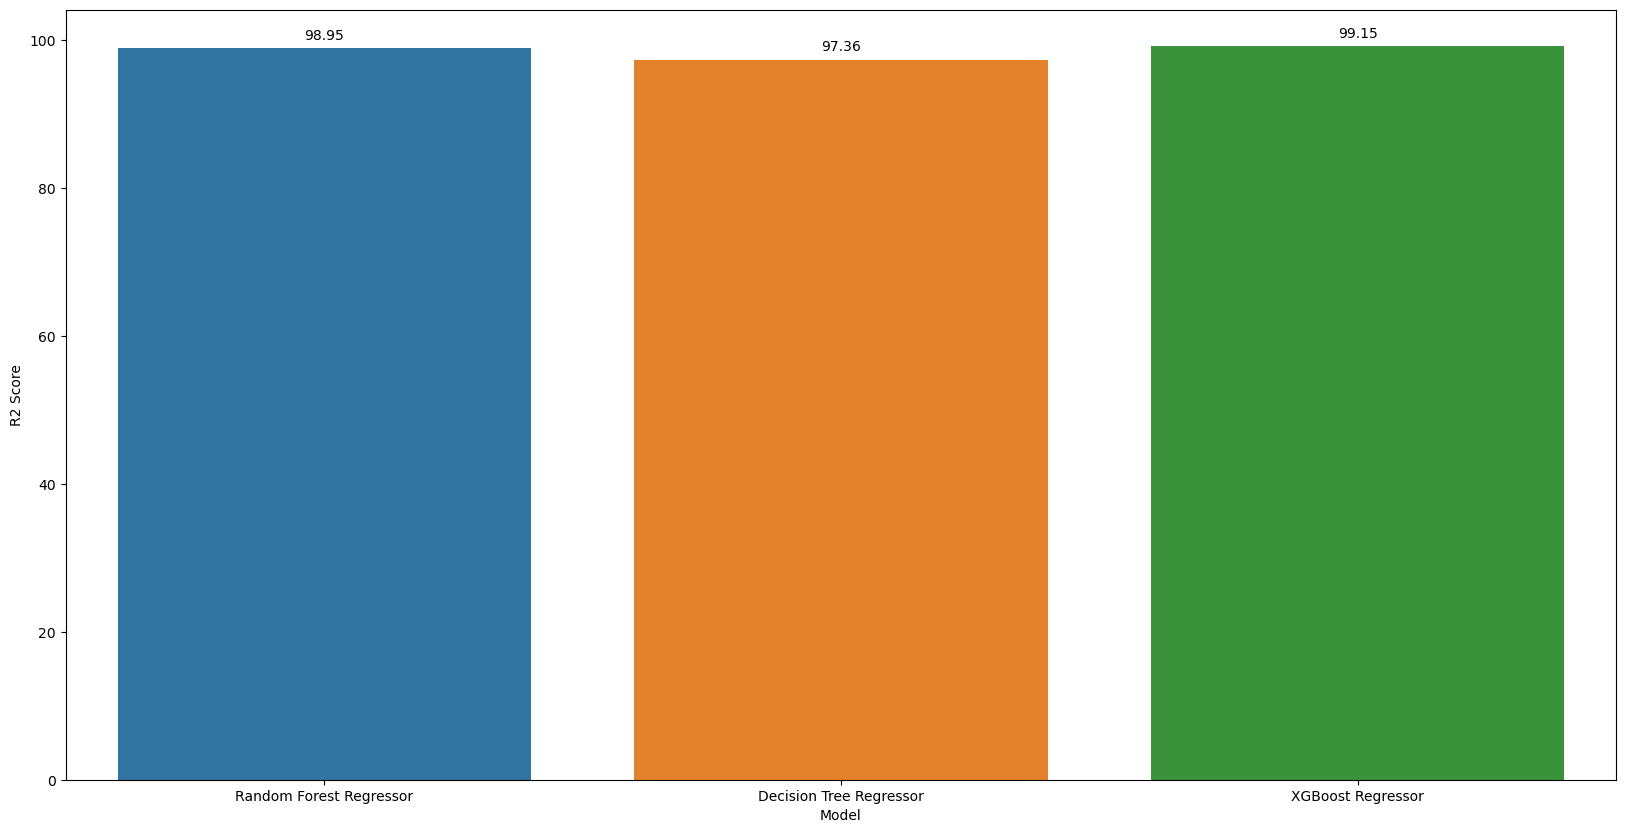

In [120]:
plt.figure(figsize=(20, 10))
barplot = sns.barplot(x="Model", y="R2 Score", data=scores_df)


for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

In [125]:
feature_importances = xg_pipeline.named_steps['regressor'].feature_importances_

# If you have preprocessed your feature names, get the transformed names
feature_names = preprocessor.get_feature_names_out()


feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)



# Print out the sorted features by importance
for feature, importance in sorted_features[:3]:
    print(f"{feature}: {importance}")



cat__SpecialEvent_No: 0.30137211084365845
remainder__DemandLevel: 0.25962603092193604
cat__Category_Main Course: 0.14811784029006958


The features listed appear to be the most important features influencing a predictive model for dynamic pricing, based on their importance scores:

1. **`cat_SpecialEvent_No`**: This feature has the highest importance score. It indicates that whether or not there is a special event is a significant predictor of dynamic pricing. Specifically, the absence of a special event seems to be highly influential. This could mean that prices are more stable or predictable when there are no special events, or conversely, that special events typically trigger a change in pricing strategy.

2. **`remainder_DemandLevel`**: The next important feature is the demand level. As expected, the demand for a particular item plays a crucial role in dynamic pricing. Higher demand could lead to higher prices due to the economic principles of supply and demand. Conversely, lower demand could trigger discounts or price reductions to move inventory.

3. **`cat_Category_Main Course`**: The category of the item, particularly being a main course, also influences dynamic pricing. Main courses are typically the centerpiece of a dining experience, and their pricing might be more sensitive to changes in cost, demand, and other factors compared to other categories like salads or desserts.

In the context of dynamic pricing, these features suggest the following:

- **Special Events**: Pricing strategies need to be adaptable to the presence of special events. During such events, prices may need to be adjusted more frequently or significantly to capitalize on increased demand or to attract customers with special offers.

- **Demand Level**: Understanding and predicting demand levels is essential for setting prices dynamically. Real-time data analysis may be used to predict demand trends and adjust prices accordingly.

- **Menu Category**: Different categories may have different pricing dynamics. For example, main courses might have a different elasticity of demand compared to other categories, and thus their prices might be adjusted differently in response to the same external factors.

These insights can help restaurants, food services, and other businesses in the hospitality sector to optimize their pricing strategy dynamically, ensuring competitiveness and profitability. It's also important to note that these features are interconnected, and the impact of each feature can vary in different contexts and market conditions.